Установка необходимых пакетов и импорт библиотек

In [ ]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 9.4 MB/s 
     |████████████████████████████████| 9.4 MB 43.8 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 965 kB 46.0 MB/s 
     |████████████████████████████████| 295 kB 48.6 MB/s 
     |████████████████████████████████| 1.1 MB 55.7 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b5d3f939fe9446d96c384397bc20ae26cd997d6a1e50e746bc6accdf2da70354
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl siz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)"

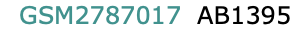 - полный вид названия первой клетки "CD45- Epcam+ (4-6 weeks)", меняется часть после GSM278... и AB...

In [ ]:
# Скачиваем CD45- EpCAM+ клетки
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
  !wget -c -nv $f'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}%5FAB{ab}%2Etxt%2Egz'
  !gzip -f -d $f'GSM278{gsm}_AB{ab}.txt.gz'

2022-12-17 21:36:15 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017%5FAB1395%2Etxt%2Egz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2022-12-17 21:36:16 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018%5FAB1396%2Etxt%2Egz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2022-12-17 21:36:17 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019%5FAB1398%2Etxt%2Egz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2022-12-17 21:36:18 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020%5FAB1458%2Etxt%2Egz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2022-12-17 21:36:19 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021%5FAB1459%2Etxt%2Egz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2022-12-17 21:36:20 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022%5FAB1539%2Etxt%2Egz [34815

# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица

In [ ]:
lst = []

for gsm, ab in gsm_list:
    df = pd.read_csv(f'/content/GSM278{gsm}_AB{ab}.txt', sep='\t')
    lst.append(df)

counts = pd.concat(lst, axis=1)

counts

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столбцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [ ]:
# Загружаем файл от авторов статьи
df = pd.read_csv('/content/thymus_epithel_clusts.txt', sep='\t')
df = df.rename(columns={"Unnamed: 0": "", "clust": "clust", "group": "group"})
df.index = df['']
df = df.drop('', axis=1)
df

,clust,group
,,
W160351,2,mTEC-IV
W160352,32,mTEC-III
W160353,35,mTEC-II
W160357,34,mTEC-II
W160358,3,mTEC-IV
...,...,...
W271100,30,mTEC-II
W271101,23,mTEC-III
W271102,35,mTEC-II


In [ ]:
# Сопоставление по клеткам
intersection = set(df.index).intersection(set(counts.columns)) #преобразуем в сет и ищем пересечения
counts = counts.loc[:, intersection] # возвращает все строки для данных столбцов
counts

,W291677,W340635,W378656,W292330,W378482,W291668,W431960,W339691,W315055,W378625,...,W341132,W378946,W431333,W340405,W431440,W339870,W340214,W315033,W340067,W339999
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,3,0,0,0,0,0
0610007L01Rik,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0610007P08Rik,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Нормализация TPM
for column in counts:
    counts[column] = (1e6/counts[column].sum())*counts[column] #считаем тпм для каждого
counts

,W291677,W340635,W378656,W292330,W378482,W291668,W431960,W339691,W315055,W378625,...,W341132,W378946,W431333,W340405,W431440,W339870,W340214,W315033,W340067,W339999
0610005C13Rik,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
0610007C21Rik,0.0,0.0,0.0,0.000000,149.499178,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,79.076388,0.0,523.012552,0.0,0.0,0.000000,0.0,0.0
0610007L01Rik,0.0,0.0,0.0,104.182945,149.499178,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,79.076388,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
0610007P08Rik,0.0,0.0,0.0,0.000000,149.499178,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
0610007P14Rik,0.0,0.0,0.0,52.091473,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,79.076388,0.0,0.000000,0.0,0.0,598.444045,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
snoZ178,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
snoZ39,0.0,0.0,0.0,104.182945,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
snoZ40,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Отбираем нужные нам гены
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']
counts = counts.loc[markers, :]
counts

,W291677,W340635,W378656,W292330,W378482,W291668,W431960,W339691,W315055,W378625,...,W341132,W378946,W431333,W340405,W431440,W339870,W340214,W315033,W340067,W339999
Ctsl,394.944708,2581.755594,3219.315895,15054.435589,747.495889,0.000000,0.000000,0.000000,0.000000,784.929356,...,0.000000,24282.560706,79.076388,965.250965,0.000000,1118.568233,0.000000,0.000000,3098.373354,0.000000
Psmb11,0.000000,0.000000,0.000000,2396.207741,0.000000,0.000000,0.000000,791.139241,0.000000,0.000000,...,0.000000,3311.258278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prss16,0.000000,0.000000,0.000000,6459.342606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4415.011038,237.229163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ascl1,1974.723539,3442.340792,1207.243461,0.000000,1195.993422,0.000000,0.000000,0.000000,0.000000,4709.576138,...,0.000000,0.000000,395.381939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sox4,2369.668246,0.000000,0.000000,416.731781,0.000000,1792.114695,2753.737215,0.000000,0.000000,523.286238,...,2016.129032,0.000000,0.000000,1930.501931,2266.387727,0.000000,0.000000,2992.220227,774.593338,3411.306043
Ccl21a,789.889415,0.000000,7243.460765,52.091473,0.000000,2688.172043,0.000000,0.000000,248.138958,2616.431188,...,0.000000,0.000000,158.152776,0.000000,0.000000,0.000000,0.000000,0.000000,4647.560031,0.000000
Apoe,0.000000,5163.511188,0.000000,1354.378288,0.000000,0.000000,1966.955153,0.000000,496.277916,3401.360544,...,0.000000,2207.505519,79.076388,0.000000,0.000000,0.000000,11070.110701,0.000000,3872.966692,0.000000
Ly6a,0.000000,5163.511188,0.000000,0.000000,149.499178,896.057348,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1795.332136,774.593338,0.000000
Ccl21c,789.889415,2581.755594,804.828974,0.000000,0.000000,8064.516129,0.000000,0.000000,0.000000,6541.077970,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.593338,0.000000
Aire,0.000000,0.000000,0.000000,0.000000,2541.486022,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,948.916653,0.000000,0.000000,1118.568233,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Дальше идёт кластеризация по группам, сохраним промежуточный результат
countsNotSorted = counts.copy()

In [ ]:
groups = df.loc[intersection, :] # возвращает все стобцы данных строк
groups

,clust,group
,,
W291677,7,mTEC-I
W340635,18,mTEC-I
W378656,17,mTEC-I
W292330,5,cTEC
W378482,26,mTEC-II
...,...,...
W339870,30,mTEC-II
W340214,32,mTEC-III
W315033,23,mTEC-III


In [ ]:
counts = counts.append(groups['group'].T)
counts

,W291677,W340635,W378656,W292330,W378482,W291668,W431960,W339691,W315055,W378625,...,W341132,W378946,W431333,W340405,W431440,W339870,W340214,W315033,W340067,W339999
Ctsl,394.944708,2581.755594,3219.315895,15054.435589,747.495889,0.0,0.0,0.0,0.0,784.929356,...,0.0,24282.560706,79.076388,965.250965,0.0,1118.568233,0.0,0.0,3098.373354,0.0
Psmb11,0.0,0.0,0.0,2396.207741,0.0,0.0,0.0,791.139241,0.0,0.0,...,0.0,3311.258278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prss16,0.0,0.0,0.0,6459.342606,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4415.011038,237.229163,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascl1,1974.723539,3442.340792,1207.243461,0.0,1195.993422,0.0,0.0,0.0,0.0,4709.576138,...,0.0,0.0,395.381939,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox4,2369.668246,0.0,0.0,416.731781,0.0,1792.114695,2753.737215,0.0,0.0,523.286238,...,2016.129032,0.0,0.0,1930.501931,2266.387727,0.0,0.0,2992.220227,774.593338,3411.306043
Ccl21a,789.889415,0.0,7243.460765,52.091473,0.0,2688.172043,0.0,0.0,248.138958,2616.431188,...,0.0,0.0,158.152776,0.0,0.0,0.0,0.0,0.0,4647.560031,0.0
Apoe,0.0,5163.511188,0.0,1354.378288,0.0,0.0,1966.955153,0.0,496.277916,3401.360544,...,0.0,2207.505519,79.076388,0.0,0.0,0.0,11070.110701,0.0,3872.966692,0.0
Ly6a,0.0,5163.511188,0.0,0.0,149.499178,896.057348,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1795.332136,774.593338,0.0
Ccl21c,789.889415,2581.755594,804.828974,0.0,0.0,8064.516129,0.0,0.0,0.0,6541.07797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,774.593338,0.0
Aire,0.0,0.0,0.0,0.0,2541.486022,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,948.916653,0.0,0.0,1118.568233,0.0,0.0,0.0,0.0


In [ ]:
counts.sort_values(by=['group'], axis=1, inplace=True)
counts

,W431871,W416193,W416171,W416607,W292325,W340669,W315026,W431416,W340101,W292391,...,W378696,W378806,W431339,W378599,W431323,W340916,W314850,W340779,W378467,W292420
Ctsl,11943.86384,554.63117,0.0,2995.805872,17781.851512,3683.241252,7840.342124,5562.827225,4484.304933,11366.865587,...,0.0,0.0,814.995925,810.372771,282.485876,0.0,692.041522,0.0,0.0,0.0
Psmb11,2388.772768,0.0,0.0,1198.322349,5316.223648,920.810313,1425.51675,818.062827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prss16,10152.284264,0.0,859.845228,3594.967046,5499.541705,4604.051565,0.0,818.062827,0.0,852.514919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.114068
Ascl1,0.0,0.0,0.0,0.0,0.0,0.0,712.758375,163.612565,0.0,568.343279,...,0.0,0.0,0.0,0.0,282.485876,0.0,0.0,0.0,0.0,0.0
Sox4,298.596596,554.63117,859.845228,0.0,0.0,0.0,712.758375,163.612565,1793.721973,0.0,...,982.318271,0.0,0.0,810.372771,1694.915254,0.0,0.0,0.0,338.86818,950.570342
Ccl21a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.612565,896.860987,6820.119352,...,0.0,0.0,0.0,0.0,0.0,0.0,692.041522,0.0,0.0,0.0
Apoe,298.596596,554.63117,0.0,299.580587,916.590284,1841.620626,3563.791875,163.612565,7174.887892,1989.201478,...,0.0,0.0,407.497963,1620.745543,564.971751,2523.659306,0.0,0.0,338.86818,0.0
Ly6a,0.0,0.0,0.0,299.580587,183.318057,920.810313,4276.550249,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1261.829653,0.0,0.0,0.0,0.0
Ccl21c,0.0,0.0,0.0,299.580587,0.0,0.0,0.0,163.612565,0.0,1136.686559,...,0.0,0.0,0.0,0.0,0.0,1892.744479,0.0,0.0,0.0,0.0
Aire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,896.860987,0.0,...,982.318271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
counts = counts.drop(index=['group'])
counts

,W431871,W416193,W416171,W416607,W292325,W340669,W315026,W431416,W340101,W292391,...,W378696,W378806,W431339,W378599,W431323,W340916,W314850,W340779,W378467,W292420
Ctsl,11943.86384,554.63117,0.0,2995.805872,17781.851512,3683.241252,7840.342124,5562.827225,4484.304933,11366.865587,...,0.0,0.0,814.995925,810.372771,282.485876,0.0,692.041522,0.0,0.0,0.0
Psmb11,2388.772768,0.0,0.0,1198.322349,5316.223648,920.810313,1425.51675,818.062827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prss16,10152.284264,0.0,859.845228,3594.967046,5499.541705,4604.051565,0.0,818.062827,0.0,852.514919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.114068
Ascl1,0.0,0.0,0.0,0.0,0.0,0.0,712.758375,163.612565,0.0,568.343279,...,0.0,0.0,0.0,0.0,282.485876,0.0,0.0,0.0,0.0,0.0
Sox4,298.596596,554.63117,859.845228,0.0,0.0,0.0,712.758375,163.612565,1793.721973,0.0,...,982.318271,0.0,0.0,810.372771,1694.915254,0.0,0.0,0.0,338.86818,950.570342
Ccl21a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.612565,896.860987,6820.119352,...,0.0,0.0,0.0,0.0,0.0,0.0,692.041522,0.0,0.0,0.0
Apoe,298.596596,554.63117,0.0,299.580587,916.590284,1841.620626,3563.791875,163.612565,7174.887892,1989.201478,...,0.0,0.0,407.497963,1620.745543,564.971751,2523.659306,0.0,0.0,338.86818,0.0
Ly6a,0.0,0.0,0.0,299.580587,183.318057,920.810313,4276.550249,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1261.829653,0.0,0.0,0.0,0.0
Ccl21c,0.0,0.0,0.0,299.580587,0.0,0.0,0.0,163.612565,0.0,1136.686559,...,0.0,0.0,0.0,0.0,0.0,1892.744479,0.0,0.0,0.0,0.0
Aire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,896.860987,0.0,...,982.318271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


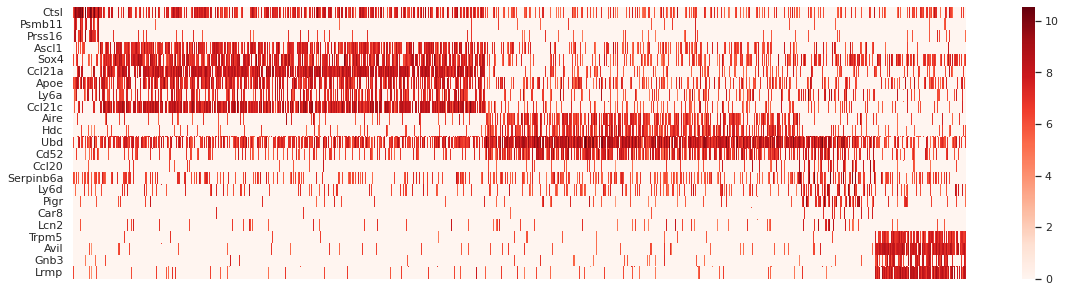

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(counts.astype(np.float32) + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем клеток на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [ ]:
# countsNotSorted - нормализованные данные, до сортировки по группам

adata = ad.AnnData(countsNotSorted.T)
sc.pp.log1p(adata)

<ipython-input-16-12f511530f8d>:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(countsNotSorted.T)


In [ ]:
# cells_type_data - тип клеток согласно авторам статьи
adata.obs["cell_type"] = groups['group'].values

In [ ]:
sc.pp.pca(adata, n_comps=22)

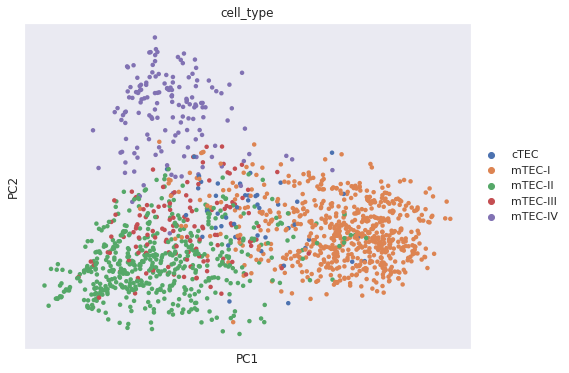

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, ax=ax)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

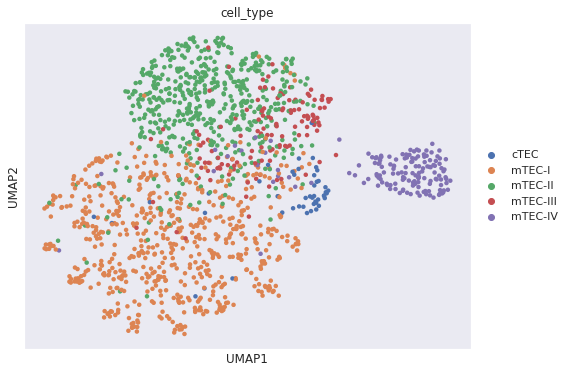

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, ax=ax)
plt.show()